# K-MEANS Clustering

In [1]:
#Importing all the neccessay libraries
import numpy as np;
import pandas as pd;
import time;
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt;

In [2]:
dftest = pd.read_csv(R'C:\Users\nikhi\Downloads\testkmean.csv')
dftest.head()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,3,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,5,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,9,0.277,-0.0218,-0.121,-0.997,-0.961,-0.984,-0.998,-0.957,-0.984,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,17,0.279,-0.0148,-0.117,-0.997,-0.982,-0.983,-0.997,-0.982,-0.981,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,26,0.279,-0.0145,-0.107,-0.998,-0.986,-0.993,-0.998,-0.985,-0.995,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294


In [3]:
dftrain= pd.read_csv(R'C:\Users\nikhi\Downloads\train.csv')
dftrain.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [4]:
#Measuring runtime and wall clock time
start_wall_time=time.time()
start_runtime=time.process_time()

#Merging the both train and test files
files = [R'C:\Users\nikhi\Downloads\train.csv', R'C:\Users\nikhi\Downloads\testkmean.csv']
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=0)
df.to_csv('merged_files.csv', index=False)

time.process_time() returns the CPU time of the current process, which is the amount of time that the process has spent executing on the CPU. This can be used to measure the run time of a program.

time.time() returns the wall clock time, which is the actual time elapsed since the start of the program. This can be used to measure the total time taken to run a program, including any time spent waiting for external resources such as disk or network I/O.

In [5]:
df.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [6]:
df.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,...,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,5155.010485,0.274926,-0.017604,-0.109201,-0.608100,-0.509424,-0.615446,-0.633967,-0.524777,-0.617088,...,0.129820,-0.305644,-0.623988,0.007809,0.010928,0.020288,-0.005565,-0.495830,0.060347,-0.051491
std,2988.297399,0.062724,0.038118,0.053431,0.439643,0.500879,0.399696,0.414132,0.484802,0.395289,...,0.242165,0.316673,0.305084,0.333982,0.449521,0.615935,0.488448,0.509835,0.308965,0.265921
min,3.000000,-0.521000,-1.000000,-0.926000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.786000,-1.000000,-0.995000,-1.000000,-1.000000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2549.250000,0.263000,-0.025100,-0.122000,-0.992000,-0.977000,-0.979000,-0.993000,-0.977000,-0.979000,...,-0.015500,-0.539000,-0.842000,-0.121000,-0.281000,-0.493000,-0.386000,-0.815750,-0.016425,-0.127750
50%,5137.000000,0.277000,-0.017200,-0.109000,-0.942000,-0.827000,-0.849500,-0.948000,-0.830500,-0.843000,...,0.135000,-0.344000,-0.710000,0.008820,0.014950,0.020350,-0.008035,-0.717000,0.183000,-0.004300
75%,7769.500000,0.288000,-0.010800,-0.098025,-0.250250,-0.055625,-0.281000,-0.301000,-0.083525,-0.288000,...,0.291000,-0.125500,-0.506000,0.144000,0.306000,0.548000,0.376000,-0.518000,0.251000,0.104000
max,10294.000000,0.693000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.947000,0.990000,0.957000,1.000000,1.000000,0.999000,0.996000,0.977000,1.000000,0.998000


In [7]:
df.shape

(5150, 563)

In [8]:
df.sample(6)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
1029,2940,LAYING,0.260,-0.0404,-0.07550,-0.984,-0.9100,-0.951,-0.98500,-0.9070,...,-0.1010,-0.460,-0.856,-0.0945,0.0842,-0.0142,-0.0294,0.300,-0.234,-0.7160
471,1315,WALKING_UPSTAIRS,0.270,-0.0118,-0.08610,-0.105,0.1230,-0.384,-0.14100,0.0450,...,0.0775,0.124,-0.225,0.2220,0.6240,0.9470,-0.7810,-0.632,0.351,0.0450
1797,5146,LAYING,0.363,0.0213,-0.47500,-0.899,-0.8350,-0.789,-0.89800,-0.8630,...,-0.5050,-0.116,-0.526,0.0846,0.1190,0.0238,-0.3860,0.566,-0.800,-0.1950
827,2354,WALKING_DOWNSTAIRS,0.235,0.0295,-0.00685,0.152,0.3840,0.293,0.00238,0.1040,...,0.2720,-0.450,-0.789,0.4290,0.8990,-0.9960,0.1660,-0.545,0.280,0.2790
1966,5619,WALKING,0.329,-0.0330,-0.14300,-0.250,-0.0565,-0.293,-0.28300,-0.0684,...,0.4350,-0.501,-0.804,-0.3890,0.9780,0.5860,0.4820,-0.860,0.167,-0.0534
3505,9973,SITTING,0.274,-0.0115,-0.09880,-0.994,-0.9480,-0.967,-0.99500,-0.9440,...,-0.0467,-0.210,-0.637,0.0939,-0.7800,0.4870,-0.3500,-0.882,0.016,0.0421


Dropping columns 'rn' and 'activity' and extracting the Labels

In [9]:
Labels = df['activity'].astype(str)
df = df.drop(['rn', 'activity'], axis=1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'nan']


In [10]:
#Checking if there are any null values in the data set
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
tBodyAcc.std.X                         0
tBodyAcc.std.Y                         0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 561, dtype: int64


In [11]:
df

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,-0.983,-0.9410,...,0.146,-0.217,-0.5640,-0.21300,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,-0.985,-0.9400,...,0.121,0.349,0.0577,0.08070,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,-0.992,-0.9430,...,0.740,-0.564,-0.7660,0.10600,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,-0.888,-0.9260,...,0.131,0.208,-0.0681,0.06230,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,-0.997,-0.9460,...,0.667,-0.942,-0.9660,0.24500,0.1030,0.0661,-0.412,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0.289,-0.02810,-0.0943,-0.0623,0.1140,-0.190,-0.114,0.0393,-0.207,0.3300,...,0.286,-0.237,-0.6070,-0.19600,0.6980,0.9900,-0.108,-0.806,0.190,0.1200
1537,0.377,-0.01810,-0.1100,-0.3140,-0.1520,-0.214,-0.394,-0.1810,-0.266,-0.0726,...,-0.191,-0.323,-0.7530,-0.82900,0.0483,0.9130,-0.904,-0.695,0.246,0.1730
1538,0.253,-0.02490,-0.1700,-0.3080,-0.1890,-0.141,-0.377,-0.2260,-0.221,0.0920,...,-0.178,-0.142,-0.5640,0.00451,0.3570,-0.9460,0.614,-0.695,0.259,0.1580
1539,0.277,0.00108,-0.0740,-0.0685,-0.2450,-0.145,-0.149,-0.3030,-0.199,0.4030,...,-0.104,0.161,-0.1260,0.13400,0.8830,-0.9940,0.475,-0.804,0.197,0.1140


The count for all columns is 0, hence there are no missing values in data

In [12]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)


In [13]:
df

array([[ 0.06496478, -0.05236574, -0.01494646, ..., -0.69866527,
         0.39378062,  0.03193361],
       [ 0.03307585,  0.12867074,  0.1160756 , ..., -0.69866527,
         0.41320217,  0.06314886],
       [ 0.03307585,  0.07619639,  0.04120585, ..., -0.69474206,
         0.4164391 ,  0.06164451],
       ...,
       [-0.3495913 , -0.19142274, -1.13799264, ..., -0.3906929 ,
         0.64302386,  0.78786926],
       [ 0.03307585,  0.49021895,  0.65888125, ..., -0.60450811,
         0.4423345 ,  0.62239081],
       [-1.32220365, -0.41968613,  0.05992329, ..., -0.29653574,
         0.71747314,  0.87436936]])

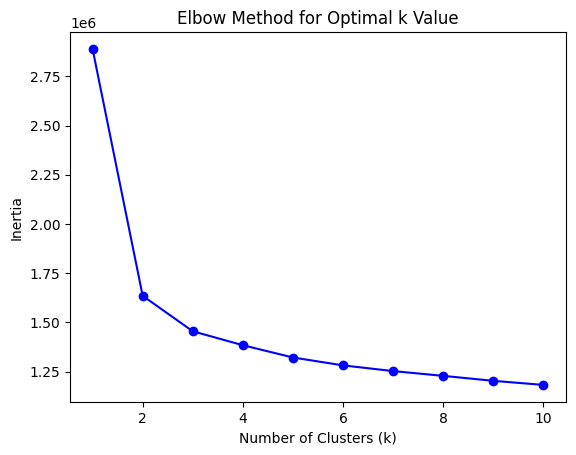

In [28]:
# Perform k-means clustering for different values of k
k_values = np.arange(1, 11)  # Try k values from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=0)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k Value')
plt.show()

The above code computes and plots the inertia (sum of squared distances of samples to their closest cluster center) for different values of k (number of clusters) and we could see that the elbow is at 2 hence K=2 is the good number of clusters for the given dataset.

In [15]:
def k_means_clustering(k, dataset, true_labels):
    """
    Input:
    k: number of clusters
    dataset: dataset of cluster
    true_labels: labels of the dataset

    """
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=90)
    kmeans.fit(dataset)
    cluster_labels = kmeans.labels_
    df = pd.DataFrame({'cluster': cluster_labels, 'true_label': true_labels.tolist()})
    ct = pd.crosstab(df['cluster'], df['true_label'])
    y_pred = kmeans.predict(dataset)
    print('Cluster-Label Crosstab:\n')
    display(ct)
    print('inertia  homogeneity   completeness   v-measure     ARS      AMI    silhouette')
    print('%i     %.3f        %.3f          %.3f      %.3f    %.3f    %.3f'
          %(kmeans.inertia_, homogeneity_score(true_labels, y_pred),
            completeness_score(true_labels, y_pred), v_measure_score(true_labels, y_pred),
            adjusted_rand_score(true_labels, y_pred),adjusted_mutual_info_score(true_labels, y_pred),
            silhouette_score(dataset, y_pred, metric='euclidean')))


In [16]:
#Implementing K-means Clustering with 2 clusters
k_means_clustering(k=2, dataset=df, true_labels=Labels)

Cluster-Label Crosstab:



true_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,nan
cluster,,,,,,,
0,1,1,0,603,493,535,702
1,680,622,668,0,0,6,839


inertia  homogeneity   completeness   v-measure     ARS      AMI    silhouette
1635032     0.254        0.687          0.371      0.162    0.371    0.393


RESULTS EXPLANATION:

Based on the crosstab, it seems that cluster 0 mostly consists of walking activities (walking, walking downstairs, walking upstairs), while cluster 1 mostly consists of stationary activities (lying, sitting, standing).

Inertia: measures how spread out the clusters are. Lower inertia generally indicates better clustering, but it's important to balance it with other metrics. The inertia value is quite high, which indicates that the clusters may be spread out and overlapping.

Homogeneity: measures how well each cluster contains only samples of a single class. Higher homogeneity indicates better clustering.The homogeneity score is high, which indicates that each cluster contains mostly samples of a single class.

Completeness: measures how well all samples of a given class are assigned to the same cluster. Higher completeness indicates better clustering.The completeness score is also high, which indicates that each class is mostly assigned to a single cluster.

V-measure: combines homogeneity and completeness into a single score. Higher v-measure indicates better clustering.The v-measure is moderate, which indicates that the clustering strikes a balance between homogeneity and completeness.

Adjusted rand score (ARS): measures the similarity between the cluster assignments and the true labels, while taking into account chance agreement. Higher ARS indicates better clustering.The ARS is quite low, which suggests that the cluster assignments are not very similar to the true labels.

Adjusted mutual info (AMI): similar to ARS, but adjusts for chance agreement and takes into account the entropy of the cluster assignments and true labels. Higher AMI indicates better clustering. The AMI is moderate, indicating that the cluster assignments are somewhat similar to the true labels.

Silhouette score: measures how similar each sample is to its own cluster compared to other clusters. Higher silhouette score indicates better clustering.The silhouette score is also moderate, suggesting that the samples within each cluster are somewhat similar to each other compared to other clusters, but there may be some overlap or ambiguity.


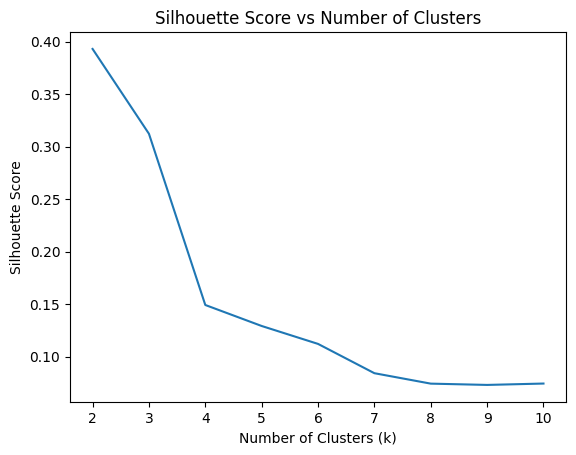

In [29]:
#Plot for the Silhouette Score vs Number of Clusters
silhouette_scores = []
ks = range(2, 11)

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

plt.plot(ks, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

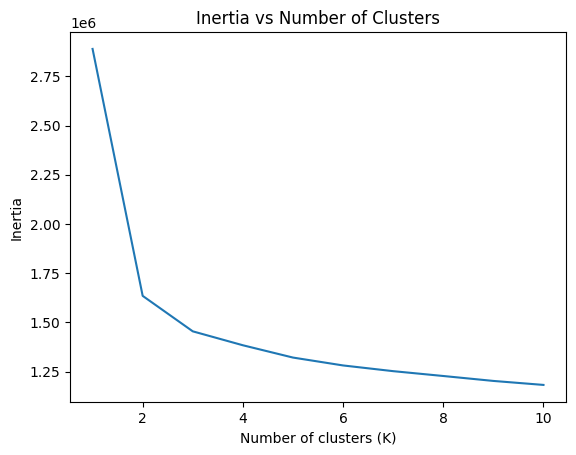

In [30]:
# Calculate inertia for different values of K
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), inertias)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()



In [17]:
#Implementing K-means Clustering with 4 clusters
k_means_clustering(k=4, dataset=df, true_labels=Labels)

Cluster-Label Crosstab:



true_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,nan
cluster,,,,,,,
0,477,371,337,0,0,0,526
1,0,0,0,182,316,58,259
2,203,251,331,0,0,2,313
3,1,1,0,421,177,481,443


inertia  homogeneity   completeness   v-measure     ARS      AMI    silhouette
1384198     0.278        0.384          0.322      0.146    0.321    0.149


In [18]:
end_wall_time=time.time()
end_runtime=time.process_time()
print(f"Wall clock time  is {end_wall_time-start_wall_time} seconds")
print(f"Run time is {end_runtime-start_runtime} seconds")

Wall clock time  is 51.72003698348999 seconds
Run time is 61.765625 seconds


In [19]:
def binary_labels(labels):
    """
    Function binary_labels converts multi-class labels into binary labels.

    Input:
    labels - array of multi-class labels

    Output:
    binary_labels - array of binary labels
    """
    binary_labels = labels.copy()
    for i in range(len(binary_labels)):
        if (binary_labels[i] == 'STANDING' or binary_labels[i] == 'SITTING' or binary_labels[i] == 'LAYING'):
            binary_labels[i] = 'STILL'
        else:
            binary_labels[i] = 'MOVING'
    return np.array(binary_labels)

binary_labels = binary_labels(Labels)


In [20]:
#Implementing K-means Clustering with 2 clusters
k_means_clustering(k=2, dataset=df, true_labels=binary_labels)

Cluster-Label Crosstab:



true_label,MOVING,STILL
cluster,,
0,2333,2
1,845,1970


inertia  homogeneity   completeness   v-measure     ARS      AMI    silhouette
1635032     0.493        0.477          0.485      0.450    0.485    0.393


# PCA

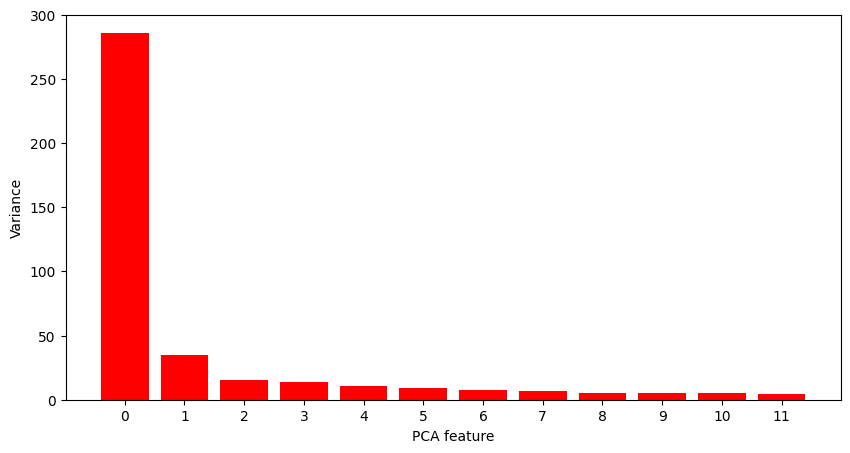

In [21]:
#Finding good number of features
pca = PCA(random_state=513)
pca.fit(df)
features = range(pca.n_components_)

plt.figure(figsize=(10,5))
plt.bar(features[:12], pca.explained_variance_[:12], color='red')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:12])
plt.show()

In [24]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=345)
    global reduceddata
    reduceddata = pca.fit_transform(df)
    print('Shape of the new Data df: ' + str(reduceddata.shape))

In [25]:
#PCA with one component
pca_transform(n_comp=1)
#Applying K-means after PCA
k_means_clustering(k=2, dataset=reduceddata, true_labels=binary_labels)

Shape of the new Data df: (5150, 1)
Cluster-Label Crosstab:



true_label,MOVING,STILL
cluster,,
0,847,1971
1,2331,1


inertia  homogeneity   completeness   v-measure     ARS      AMI    silhouette
228180     0.495        0.478          0.486      0.449    0.486    0.799


Shape of the new Data df: (5150, 2)
Cluster-Label Crosstab:



true_label,MOVING,STILL
cluster,,
0,2333,3
1,845,1969


inertia  homogeneity   completeness   v-measure     ARS      AMI    silhouette
403788     0.492        0.475          0.483      0.449    0.483    0.699


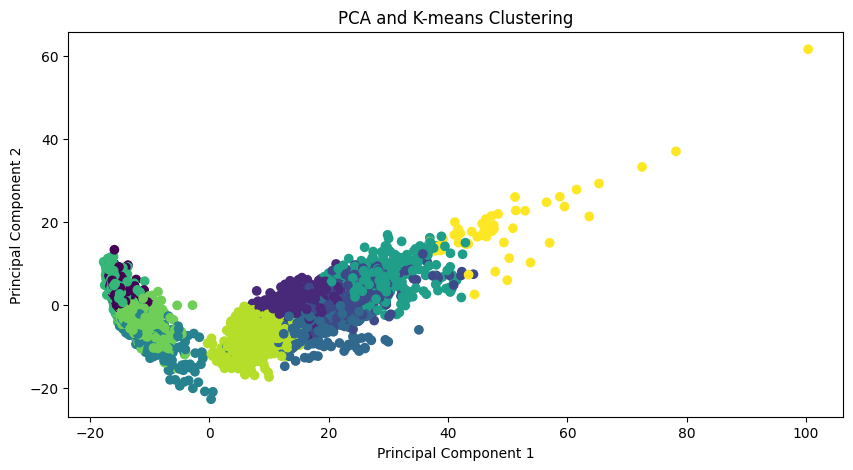

In [33]:
#Applying PCA with 2 components

pca_transform(n_comp=2)
#Applying K-means after PCA
k_means_clustering(k=2, dataset=reduceddata, true_labels=binary_labels)
# PCA and K-means clustering plot
plt.figure(figsize=(10,5))
plt.scatter(reduceddata[:, 0], reduceddata[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('PCA and K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


As we could that from above results after applying the PCA with the 2 components the silhouette score is reduced and inertia is increased by a lot compared to PCA with 1 component, so it is better to stick with 1 component.

REPORT: 
K-means clustering results with K=2 are quite good, with high values for homogeneity, completeness, v-measure, ARS, and AMI. However, the silhouette score of 0.39 indicating that the clusters may not be well-separated, as a score closer to 1 indicates better clustering.After applying PCA with one component, the number of dimensions may have been reduced, leading to a lower inertia score. Additionally, the homogeneity, completeness, v-measure, ARS, AMI have not changed and silhouette scores has improved significantly. This indicates that the PCA may have helped to better separate the clusters and improve the quality of the clustering. The silhouette score of 0.799 indicates a significant improvement in cluster separation after PCA.